In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from src.utils import switch_quotes

In [92]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c","#d62728", "#9467bd"]
data = pd.read_csv("results_tuning_stride_19_01.csv")


data['params'] = data['params'].apply(lambda x: json.loads(switch_quotes(x)))
params = data['params'][0].keys()
# add params as individual columns
data = pd.concat([data.drop(['params'], axis=1), data['params'].apply(pd.Series)], axis=1)

In [93]:
results = data[['Dataset', 'min_epochs', 'learning_rate', 'dropout', 'l2_penalty', 'init_stride', 'RMSE test']]
models = results[['min_epochs', 'learning_rate', 'dropout', 'l2_penalty', 'init_stride']
        ].sort_values(by=[ 'min_epochs', 'learning_rate', 'dropout', 'l2_penalty', 'init_stride']).drop_duplicates().reset_index()
models['index'] = [f'Model {i}' for i in range(1, len(models)+1)]
models.rename(columns={'index': 'Model'}, inplace=True)
inceptiontime_50 = data.rename(columns={'Model': 'Model type'}).merge(models, how='inner', on=['min_epochs', 'learning_rate', 'dropout', 'l2_penalty', 'init_stride'])
inceptiontime_50.to_csv("inception_time_50.csv", index=False)
num_models = len(models)


# Present ranks per dataset

In [94]:
# RANK by rmse test
ranked = []
to_show = []
for grp_idx, grp in results.groupby('Dataset'):
    # sort by RMSE_test
    grp = grp.sort_values('RMSE test')
    # add rank
    grp['Rank'] = range(1, len(grp) + 1)

    ranked.append(grp)
    # keep first three
    to_show.append(grp.iloc[:3])

ranked = pd.concat(ranked)
to_show = pd.concat(to_show)

to_show.groupby(['Dataset', 'Rank']).first() # because of ranking, there is just one line per group --> can do first


min_epochs  learning_rate  dropout  l2_penalty  \
Dataset      Rank                                                   
DS_-10_10_10 1             50        0.00010      0.3       0.000   
             2             50        0.00010      0.3       0.001   
             3             50        0.00001      0.3       0.000   
DS_-10_80_10 1             50        0.00010      0.3       0.001   
             2             50        0.00010      0.0       0.001   
             3             50        0.00010      0.0       0.000   
DS_0_10_10   1             50        0.00010      0.3       0.001   
             2             50        0.00010      0.3       0.000   
             3             50        0.00010      0.3       0.000   
DS_0_80_10   1             50        0.00010      0.3       0.000   
             2             50        0.00010      0.0       0.001   
             3             50        0.00010      0.3       0.001   
DS_10_10_10  1             50        0.00010      0.3       0.000   
             2             50        0.00010      0.3       0.001   
             3             50        0.00010      0.0       0.001   
DS_10_80_10  1             50        0.00010      0.3       0.000   
             2             50        0.00010      0.3       0.001   
             3             50        0.00010      0.3       0.000   
DS_20_10_10  1             50        0.00010      0.0       0.001   
             2             50        0.00010      0.0       0.000   
             3             50        0.00010      0.0       0.000   
DS_20_80_10  1             50        0.00010      0.3       0.001   
             2             50        0.00100      0.3       0.001   
             3             50        0.00010      0.3       0.000   
DS_50_10_10  1             50        0.00010      0.0       0.001   
             2             50        0.00010      0.0       0.000   
             3             50        0.00100      0.0       0.001   
DS_50_80_10  1             50        0.00100      0.0       0.001   
             2             50        0.00100      0.0       0.000   
             3             50        0.00010      0.0       0.001   
DS_80_10_10  1             50        0.00010      0.0       0.000   
             2             50        0.00100      0.0       0.001   
             3             50        0.00010      0.0       0.001   
DS_80_80_10  1             50        0.00100      0.0       0.001   
             2             50        0.00100      0.0       0.000   
             3             50        0.00010      0.3       0.000   

                   init_stride  RMSE test  
Dataset      Rank                          
DS_-10_10_10 1              -1  10.773037  
             2              -1  10.964118  
             3              -1  11.164275  
DS_-10_80_10 1              -1  10.735251  
             2              -1  11.067074  
             3               2  11.219045  
DS_0_10_10   1              -1  10.998718  
             2               2  11.078684  
             3              -1  11.162801  
DS_0_80_10   1              -1  10.915551  
             2              -1  10.991591  
             3              -1  11.197246  
DS_10_10_10  1              -1  10.550848  
             2              -1  10.594497  
             3               2  10.859944  
DS_10_80_10  1               2  10.728700  
             2              -1  10.803152  
             3              -1  10.883192  
DS_20_10_10  1               2   9.977595  
             2              -1  10.279555  
             3               2  10.529718  
DS_20_80_10  1               2   9.910451  
             2               2  10.704150  
             3              -1  10.825252  
DS_50_10_10  1              -1   9.877464  
             2              -1  10.000744  
             3              -1  10.136727  
DS_50_80_10  1              -1   6.798054  
             2              -1   6.903403  
             3               2  

In [95]:
ranked.pivot_table(index='Dataset', columns='Rank', values='RMSE test')

Rank,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Dataset,,,,,,,,,,,,,,,,,,,,,
DS_-10_10_10,10.773037,10.964118,11.164275,11.352479,11.371674,11.914662,12.047639,13.041097,13.198598,14.563507,...,20.118042,20.898975,21.367357,21.520325,21.774317,22.627132,24.239058,32.132524,33.901664,36.611231
DS_-10_80_10,10.735251,11.067074,11.219045,11.941647,11.995388,12.027465,12.367843,12.372527,13.171488,13.280538,...,15.626507,15.904580,16.030497,16.412415,17.147190,17.275073,20.455582,22.945374,32.080080,34.615409
DS_0_10_10,10.998718,11.078684,11.162801,11.518134,11.604808,11.635275,12.213345,12.641220,12.739902,13.089409,...,17.092626,17.877027,18.522869,19.257747,21.743292,23.196429,24.105627,27.859009,33.019074,36.568126
DS_0_80_10,10.915551,10.991591,11.197246,11.269553,11.458076,11.522363,11.539719,11.849579,12.614580,13.638202,...,21.570259,22.541129,22.706207,23.424790,24.627642,27.035864,33.860420,35.949408,46.552057,55.690974
DS_10_10_10,10.550848,10.594497,10.859944,10.974459,11.348759,11.361877,11.515819,11.759671,12.146381,12.269829,...,14.055632,14.629017,14.754217,14.800170,15.751728,16.004323,19.830933,25.410603,28.695086,29.058465
DS_10_80_10,10.728700,10.803152,10.883192,11.569481,12.063666,12.440208,12.683135,12.718485,13.610439,15.201484,...,20.556646,21.002791,21.287283,24.199295,25.258948,25.903087,28.133964,29.803915,34.974043,35.385594
DS_20_10_10,9.977595,10.279555,10.529718,10.851032,10.932654,10.991391,11.006829,11.111257,11.213425,11.400175,...,12.809605,12.849311,13.197444,13.384932,13.951984,15.274491,18.871206,20.188704,22.944496,22.974627
DS_20_80_10,9.910451,10.704150,10.825252,10.936541,11.065537,11.388879,11.420176,11.492182,11.647228,12.217714,...,15.799048,17.928555,18.010021,20.329137,30.801471,32.982891,33.312460,36.014905,38.056983,52.888377
DS_50_10_10,9.877464,10.000744,10.136727,10.265090,10.326114,10.436766,10.529946,10.749580,10.778022,10.881014,...,11.458340,11.842782,12.128391,13.349786,13.700431,15.835004,22.598470,24.377186,29.787023,32.186087


In [96]:
# the whole ranking

ranked.groupby(['Dataset', 'Rank']).first()

min_epochs  learning_rate  dropout  l2_penalty  \
Dataset      Rank                                                   
DS_-10_10_10 1             50        0.00010      0.3       0.000   
             2             50        0.00010      0.3       0.001   
             3             50        0.00001      0.3       0.000   
             4             50        0.00100      0.3       0.000   
             5             50        0.00100      0.3       0.001   
...                       ...            ...      ...         ...   
DS_80_80_10  20            50        0.00100      0.3       0.000   
             21            50        0.00001      0.0       0.001   
             22            50        0.00001      0.0       0.000   
             23            50        0.00100      0.0       0.000   
             24            50        0.00100      0.0       0.001   

                   init_stride  RMSE test  
Dataset      Rank                          
DS_-10_10_10 1              -1  10.773037  
             2              -1  10.964118  
             3              -1  11.164275  
             4              -1  11.352479  
             5              -1  11.371674  
...                        ...        ...  
DS_80_80_10  20              2  29.739130  
             21              2  30.125704  
             22              2  35.656593  
             23              2  87.438441  
             24              2  90.096380  

[288 rows x 6 columns]

# Pairwise-wilcoxons signed-rank test
1. performed on ranks
2. using the holm-correction when forming groups


In [97]:
ranked

,Dataset,min_epochs,learning_rate,dropout,l2_penalty,init_stride,RMSE test,Rank
52,DS_-10_10_10,50,0.00010,0.3,0.000,-1,10.773037,1
60,DS_-10_10_10,50,0.00010,0.3,0.001,-1,10.964118,2
248,DS_-10_10_10,50,0.00001,0.3,0.000,-1,11.164275,3
21,DS_-10_10_10,50,0.00100,0.3,0.000,-1,11.352479,4
28,DS_-10_10_10,50,0.00100,0.3,0.001,-1,11.371674,5
...,...,...,...,...,...,...,...,...
155,DS_80_80_10,50,0.00100,0.3,0.000,2,29.739130,20
242,DS_80_80_10,50,0.00001,0.0,0.001,2,30.125704,21
202,DS_80_80_10,50,0.00001,0.0,0.000,2,35.656593,22
140,DS_80_80_10,50,0.00100,0.0,0.000,2,87.438441,23


/tmp/ipykernel_7863/4082450477.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('magma_r', num_models)    # 11 discrete colors


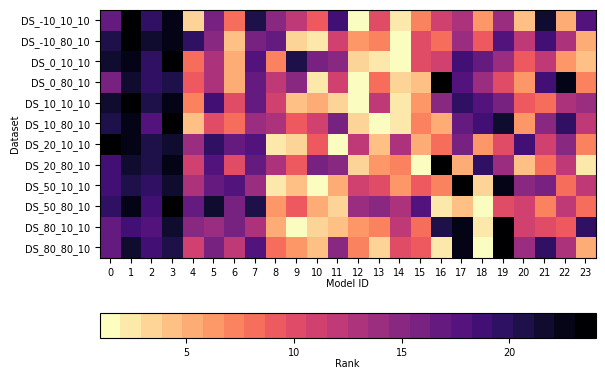

,DS_-10_10_10,DS_-10_80_10,DS_0_10_10,DS_0_80_10,DS_10_10_10,DS_10_80_10,DS_20_10_10,DS_20_80_10,DS_50_10_10,DS_50_80_10,DS_80_10_10,DS_80_80_10,min_epochs,learning_rate,dropout,l2_penalty,init_stride
0,17,21,22,16,22,21,24,19,19,20,17,17,50,0.00001,0.0,0.000,-1
1,24,24,23,22,24,23,23,22,21,23,19,22,50,0.00001,0.0,0.000,2
2,20,22,20,20,21,18,21,21,20,19,18,19,50,0.00001,0.0,0.001,-1
3,23,23,24,21,23,24,22,23,22,24,22,21,50,0.00001,0.0,0.001,2
4,3,20,8,9,7,4,14,11,13,17,15,11,50,0.00001,0.3,0.000,-1
5,16,15,13,13,19,10,20,18,17,22,14,16,50,0.00001,0.3,0.000,2
6,8,4,5,5,10,8,17,10,18,16,16,12,50,0.00001,0.3,0.001,-1
7,21,16,18,17,17,14,18,17,14,21,13,18,50,0.00001,0.3,0.001,2
8,15,17,7,12,11,13,2,13,2,6,5,8,50,0.00010,0.0,0.000,-1
9,12,3,21,15,4,9,3,9,4,9,1,6,50,0.00010,0.0,0.000,2


In [102]:
performance_data = {}

for idx, grp in ranked.groupby(['Dataset']):
    grp_sorted = grp.sort_values(by=['min_epochs', 'learning_rate', 'dropout', 'l2_penalty', 'init_stride']) 
    performance_data[idx[0]] = grp_sorted['Rank'].values
    

performance_data = pd.DataFrame(performance_data) # model id x dataset name
cmap = plt.cm.get_cmap('magma_r', num_models)    # 11 discrete colors

im = plt.imshow(performance_data.T, cmap=cmap)
#axis('off')
cbar = plt.colorbar(label='Rank', orientation='horizontal')
cbar.ax.invert_yaxis()

plt.xticks(range(len(performance_data)), performance_data.index)
plt.yticks(range(len(performance_data.columns)), performance_data.columns)
plt.ylabel('Dataset')
plt.xlabel('Model ID')
plt.show()

# just using last group but it should be the same order for all
performance_data = pd.concat((performance_data, 
                              grp_sorted.reset_index()[['min_epochs', 'learning_rate', 'dropout', 'l2_penalty', 'init_stride']]), 
                              axis=1)

performance_data

In [152]:
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

# compare models with wilcoxon
alpha = 0.05

p_values = []

for i in range(24):
    for j in range(24):
        #print(f"Comparing model {i} with model {j}")
        if i == j:
            p_values.append(0)
            continue
        datasets = [x for x in performance_data.columns if x.startswith('DS')]
        res = wilcoxon(performance_data[datasets].loc[i], 
                       performance_data[datasets].loc[j], 
                       method='exact')
        p_values.append(res.pvalue) # if p low enough there is a difference. if the p is higer than alpha, there is no significant difference
adjusted_p_values = p_values
#adjusted_p_values = multipletests(p_values, alpha=0.1)[1] # we have so many models, that the correction is extremely strict. 

#print(adjusted_p_values[1])

# Create a matrix of indistinguishable models with adjusted p_values
indistinguishable_matrix = np.zeros((24, 24))
for i in range(24):
    for j in range(24):
        if i == j:
            continue
        indistinguishable_matrix[i, j] = adjusted_p_values[i*24+j] > alpha
#pd.DataFrame(indistinguishable_matrix)

# Group models based on indistinguishability
groups = []
for model in range(24):
    found = False
    for group in groups:
        if all(indistinguishable_matrix[model, member] == 1 for member in group):
            group.append(model)
            found = True
            break
    if not found:
        groups.append([model])

# Display the groups of indistinguishable models
print("Indistinguishable Model Groups:")
for group in groups:
    print(group)

Indistinguishable Model Groups:
[0, 2, 17, 19]
[1, 3]
[4, 6, 8, 9, 10, 11, 13, 15, 16, 18, 20, 23]
[5, 7, 21, 22]
[12, 14]


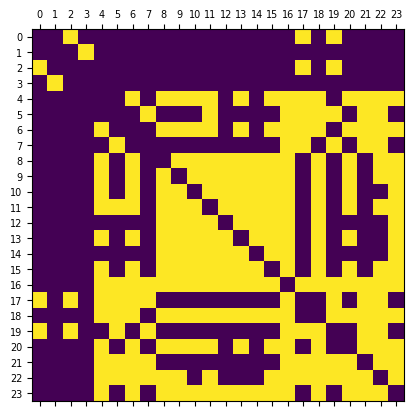

In [153]:
plt.matshow(indistinguishable_matrix)
plt.xticks(range(24))
plt.yticks(range(24))
plt.show()

# Critical difference plot

[0, 2, 17, 19]
[1, 3]
[4, 6, 8, 9, 10, 11, 13, 15, 16, 18, 20, 23]
[5, 7, 21, 22]
[12, 14]


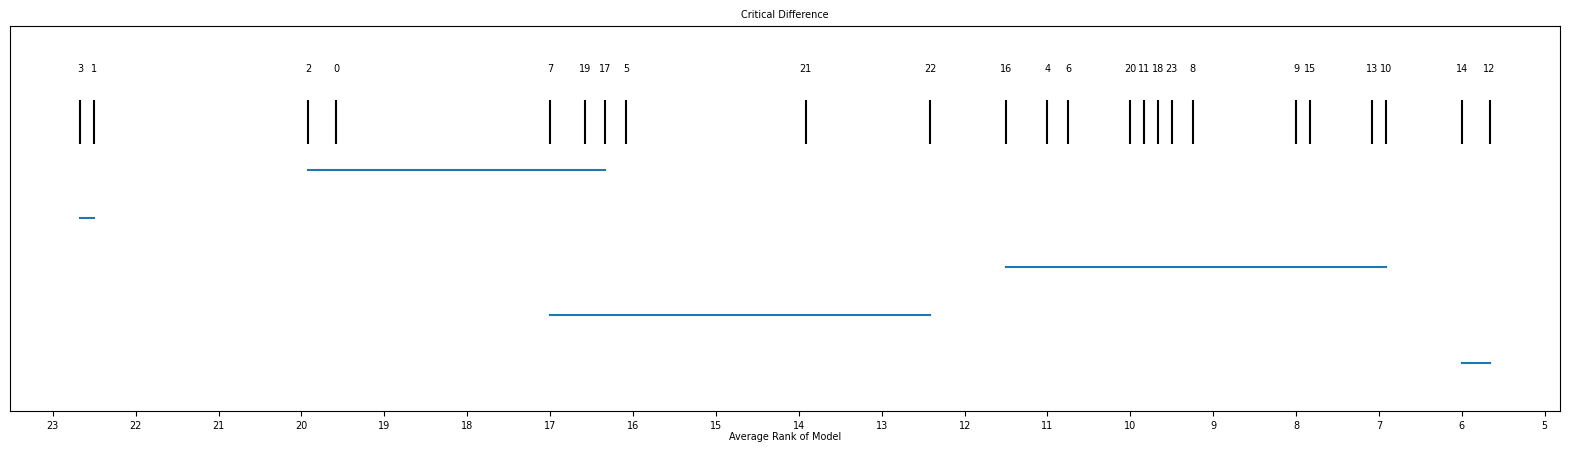

In [155]:

# average rank for model per dataset

average_ranking = ranked.groupby(['min_epochs', 'learning_rate', 'dropout', 'l2_penalty', 'init_stride']).agg({'Rank': 'mean'}).reset_index().sort_values(by='Rank')

plt.figure(figsize=(20, 5))
plt.title("Critical Difference")
plt.scatter(average_ranking['Rank'], np.zeros(24), marker='|', c='black', s=1000)
plt.yticks([])
plt.xticks([i for i in range(1, 25)])
plt.gca().invert_xaxis()
# add model id above each point
for i, row in average_ranking.iterrows():
    plt.text(row['Rank'], 1, i, va='bottom', ha='center')

plt.xlabel('Average Rank of Model')

# groups with horizontal connectors
for i, group in enumerate(groups):
    print(group)
    #print(average_ranking.loc[group])
    # get index with minimum rank
    min_rank_idx = average_ranking.loc[group]['Rank'].idxmin()
    max_rank_idx = average_ranking.loc[group]['Rank'].idxmax()
    plt.plot([average_ranking.loc[min_rank_idx]['Rank'], average_ranking.loc[max_rank_idx]['Rank']], [-(i+1), -(i+1)], color='tab:blue')

plt.ylim(-len(groups)-1, 2)
plt.show()

In [183]:
best_models = average_ranking.iloc[0:3]
best_models

,min_epochs,learning_rate,dropout,l2_penalty,init_stride,Rank
12,50,0.0001,0.3,0.000,-1,5.666667
14,50,0.0001,0.3,0.001,-1,6.000000
10,50,0.0001,0.0,0.001,-1,6.916667
